Create and Art with Neural style transfer on given image using deep learning.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, img_height, img_width):
    img = keras_image.load_img(image_path, target_size=(img_height, img_width))
    img = keras_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.clip(tensor, 0, 255).astype('uint8')
    return tensor[0]

style_image_path =  r'content1.jpg'
content_image_path = r'style1.jpg'

img_height = 400
img_width = 400

style_image = load_and_preprocess_image(style_image_path, img_height, img_width)
content_image = load_and_preprocess_image(content_image_path, img_height, img_width)

In [6]:
import tensorflow as tf

def style_loss(style_targets, style_outputs):
    loss = tf.zeros(shape=()) 
    num_layers = len(style_targets)  

    for i in range(num_layers):
        target_features = style_targets[i]
        output_features = style_outputs[i]

        target_gram_matrix = gram_matrix(target_features)
        output_gram_matrix = gram_matrix(output_features)

        layer_loss = tf.reduce_mean(tf.square(target_gram_matrix - output_gram_matrix))
        
        loss += layer_loss
    
    total_loss = loss / float(num_layers)
    
    return total_loss

def gram_matrix(tensor):
    batch_size, height, width, channels = tensor.get_shape().as_list()
    
    reshaped_tensor = tf.reshape(tensor, [batch_size * height * width, channels])
    
    gram = tf.matmul(reshaped_tensor, reshaped_tensor, transpose_a=True)
    
    num_elements = tf.cast(batch_size * height * width * channels, tf.float32)
    gram /= num_elements
    
    return gram
generated_image = tf.Variable(content_image, dtype=tf.float32)

optimizer = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

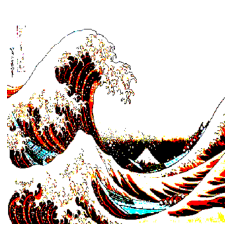

In [7]:
final_image = tensor_to_image(generated_image.numpy())

plt.imshow(final_image)
plt.axis('off')
plt.show()